In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eps = pd.read_csv('C:/Users/justi/SpringboardDS/Dataset Story Exercise/breaking_bad_episodes.csv')
eps.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Vince Gilligan,Vince Gilligan,2008-01-20,1410000.0
1,1,2,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,2008-01-27,1490000.0
2,1,3,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,2008-02-10,1080000.0
3,1,4,4,Cancer Man,Jim McKay,Vince Gilligan,2008-02-17,1090000.0
4,1,5,5,Gray Matter,Tricia Brock,Patty Lin,2008-02-24,970000.0


In [3]:
eps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 62 non-null     int64  
 1   episode_num_in_season  62 non-null     int64  
 2   episode_num_overall    62 non-null     int64  
 3   title                  62 non-null     object 
 4   directed_by            62 non-null     object 
 5   written_by             62 non-null     object 
 6   original_air_date      62 non-null     object 
 7   us_viewers             57 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.0+ KB


In [4]:
eps[eps['us_viewers'].isnull()]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
13,2,7,14,Negro y Azul,Felix Alcala,John Shiban,2009-04-19,NaN
15,2,9,16,4 Days Out,Michelle MacLaren,Sam Catlin,2009-05-03,NaN
16,2,10,17,Over,Phil Abraham,Moira Walley-Beckett,2009-05-10,NaN
17,2,11,18,Mandala,Adam Bernstein,George Mastras,2009-05-17,NaN
18,2,12,19,Phoenix,Colin Bucksey,John Shiban,2009-05-24,NaN


In [5]:
# Imputing missing values using the season avg.
eps.us_viewers.fillna(eps[eps['season']==2].us_viewers.mean(), inplace=True)

In [6]:
imdb = pd.read_csv('C:/Users/justi/SpringboardDS/Dataset Story Exercise/breaking_bad_imdb.csv')
imdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2008-01-20,9.1,30419,"Diagnosed with terminal lung cancer, chemistry..."
1,1,2,Cat's in the Bag...,2008-01-27,8.7,22282,After their first drug deal goes terribly wron...
2,1,3,...And the Bag's in the River,2008-02-10,8.8,21633,Walt and Jesse clean up after the bathtub inci...
3,1,4,Cancer Man,2008-02-17,8.3,20912,Walt tells the rest of his family about his ca...
4,1,5,Gray Matter,2008-02-24,8.4,20546,Walt rejects everyone who tries to help him wi...


In [7]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             62 non-null     int64  
 1   episode_num        62 non-null     int64  
 2   title              62 non-null     object 
 3   original_air_date  62 non-null     object 
 4   imdb_rating        62 non-null     float64
 5   total_votes        62 non-null     int64  
 6   desc               62 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.5+ KB


In [8]:
imdb.drop(columns=['season','episode_num','original_air_date','desc'], inplace=True)
df = eps.merge(imdb, on='title')

In [9]:
df['original_air_date'] = pd.to_datetime(df['original_air_date'])
df['count'] = 1
df['us_viewers']=df['us_viewers']/1000000 # scale down (millions)

In [10]:
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers,imdb_rating,total_votes,count
0,1,1,1,Pilot,Vince Gilligan,Vince Gilligan,2008-01-20,1.41,9.1,30419,1
1,1,2,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,2008-01-27,1.49,8.7,22282,1
2,1,3,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,2008-02-10,1.08,8.8,21633,1
3,1,4,4,Cancer Man,Jim McKay,Vince Gilligan,2008-02-17,1.09,8.3,20912,1
4,1,5,5,Gray Matter,Tricia Brock,Patty Lin,2008-02-24,0.97,8.4,20546,1


In [11]:
df.shape

(62, 11)

### EDA

**How does the U.S. viewer count change throughout the airing of the show?**

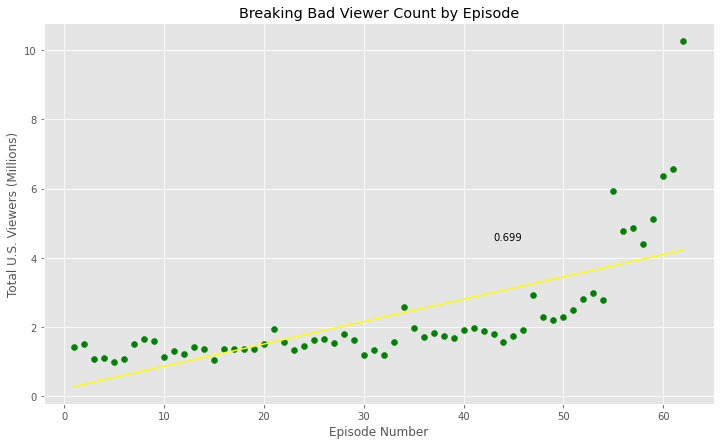

In [12]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (12,7))
plt.scatter(x='episode_num_overall', y='us_viewers', data=df, color='green')
a, b = np.polyfit(df.episode_num_overall, df.us_viewers, 1)
plt.plot(df.episode_num_overall, a*df.episode_num_overall+b, color='yellow')
plt.text(43,4.5, round(df['episode_num_overall'].corr(df['us_viewers']), 3))
ax.ticklabel_format(style='plain')
plt.title('Breaking Bad Viewer Count by Episode')
plt.ylabel('Total U.S. Viewers (Millions)')
plt.xlabel('Episode Number')
plt.show()

The plot above shows that viewership in the U.S goes up the further into the season, especially from episodes 50 and on.

**How do the IMDB ratings change throughout the show?**

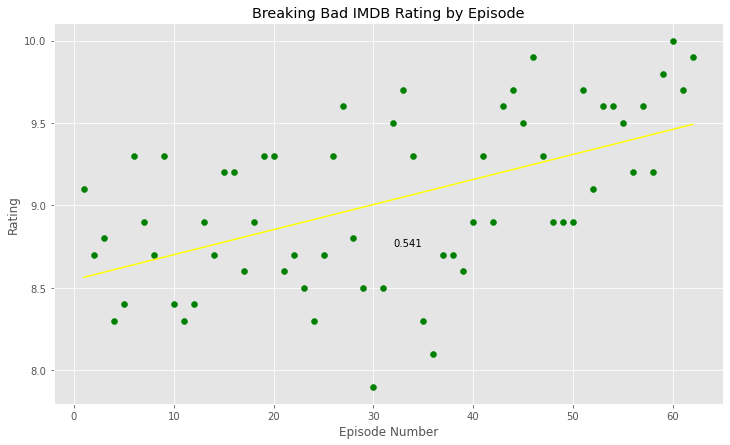

In [13]:
fig, ax = plt.subplots(figsize = (12,7))
plt.scatter(x='episode_num_overall', y='imdb_rating', data=df, color='green')
a, b = np.polyfit(df.episode_num_overall, df.imdb_rating, 1)
plt.plot(df.episode_num_overall, a*df.episode_num_overall+b, color='yellow')
plt.text(32,8.75, round(df['episode_num_overall'].corr(df['imdb_rating']), 3))
plt.title('Breaking Bad IMDB Rating by Episode')
plt.ylabel('Rating')
plt.xlabel('Episode Number')
plt.show()

The above scatterplot shows that later episodes in the series tend to have higher ratings, but the relationship isn't that strong.

**How does the average number of U.S. viewers and average IMDB rating per episode differ among directors?**

In [14]:
directors = df.groupby('directed_by').agg({'us_viewers':'mean','imdb_rating':'mean','count':'count'}).sort_values(by='us_viewers', ascending=False)

In [15]:
directors.rename(columns={'us_viewers':'us_viewers_avg','imdb_rating':'imdb_rating_avg','count':'total_episodes_directed'}, inplace=True)

# Sorted by average U.S. viewers.
directors

,us_viewers_avg,imdb_rating_avg,total_episodes_directed
directed_by,,,
Sam Catlin,4.410000,9.200000,1
Peter Gould,4.245000,9.300000,2
Vince Gilligan,3.376000,9.620000,5
Rian Johnson,3.286667,8.933333,3
Bryan Cranston,3.176667,8.933333,3
Thomas Schnauz,2.980000,9.600000,1
Michael Slovis,2.765000,9.000000,4
George Mastras,2.480000,9.700000,1
Michelle MacLaren,2.363182,9.081818,11


In [16]:
# Sorted by average IMDB rating.
directors.sort_values(by='imdb_rating_avg', ascending=False)

,us_viewers_avg,imdb_rating_avg,total_episodes_directed
directed_by,,,
George Mastras,2.480000,9.700000,1
Vince Gilligan,3.376000,9.620000,5
Thomas Schnauz,2.980000,9.600000,1
John Shiban,1.640000,9.300000,1
Bronwen Hughes,1.070000,9.300000,1
Charles Haid,1.600000,9.300000,1
Peter Gould,4.245000,9.300000,2
Sam Catlin,4.410000,9.200000,1
Michelle MacLaren,2.363182,9.081818,11


**How does the average number of U.S. viewers and average IMDB rating per episode differ among writers?**

In [17]:
writers = df.groupby('written_by').agg({'us_viewers':'mean','imdb_rating':'mean','count':'count'}).sort_values(by='us_viewers', ascending=False)

In [18]:
writers.rename(columns={'us_viewers':'us_viewers_avg','imdb_rating':'imdb_rating_avg','count':'total_episodes_written'}, inplace=True)

# Sorted by average U.S. viewers.
writers

,us_viewers_avg,imdb_rating_avg,total_episodes_written
written_by,,,
Gennifer Hutchison,2.777500,9.025000,4
Thomas Schnauz,2.755000,9.275000,4
Peter Gould,2.728750,9.025000,8
Moira Walley-Beckett,2.525833,9.000000,6
Vince Gilligan,2.505000,9.150000,12
George Mastras,2.130714,9.114286,7
Sam Catlin,2.085833,8.666667,6
Sam Catlin & George Mastras,1.980000,9.300000,1
Moira Walley-Beckett & Thomas Schnauz,1.890000,8.900000,1


In [19]:
# Sorted by average IMDB rating.
writers.sort_values(by='imdb_rating_avg', ascending=False)

,us_viewers_avg,imdb_rating_avg,total_episodes_written
written_by,,,
George Mastras & Sam Catlin,1.550000,9.700000,1
Peter Gould & Gennifer Hutchison,1.800000,9.600000,1
Thomas Schnauz & Moira Walley-Beckett,1.730000,9.500000,1
Sam Catlin & Peter Gould,1.190000,9.500000,1
Sam Catlin & George Mastras,1.980000,9.300000,1
Thomas Schnauz,2.755000,9.275000,4
Vince Gilligan,2.505000,9.150000,12
George Mastras,2.130714,9.114286,7
John Shiban,1.450000,9.100000,3


Text(0.5, 0, 'Total Episodes Written by Same Person')

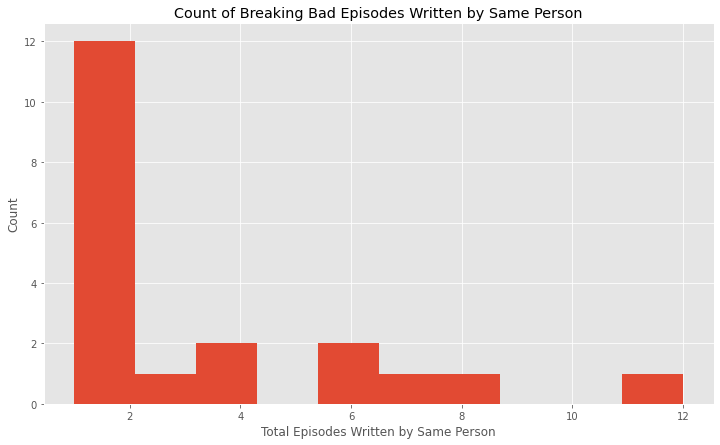

In [20]:
fig, ax = plt.subplots(figsize = (12,7))
plt.hist(x='total_episodes_written', data=writers)
plt.title('Count of Breaking Bad Episodes Written by Same Person')
plt.ylabel('Count')
plt.xlabel('Total Episodes Written by Same Person')

It is clear from the plot above that the majority of episodes are written by people that have not written a second.

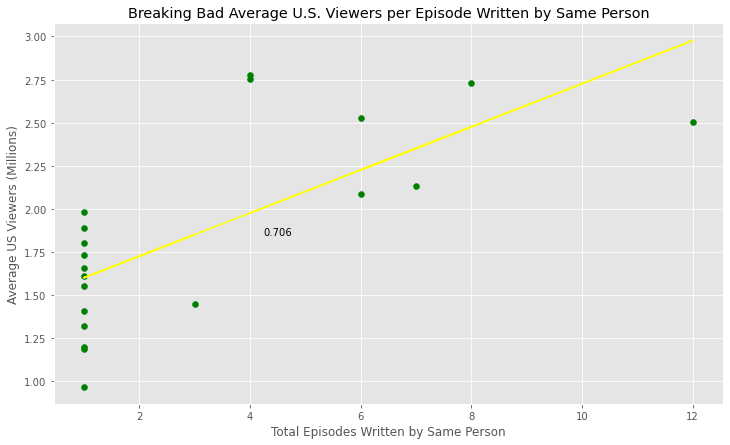

In [21]:
fig, ax = plt.subplots(figsize = (12,7))
plt.scatter(x='total_episodes_written', y='us_viewers_avg', data=writers, color='green')
a, b = np.polyfit(writers.total_episodes_written, writers.us_viewers_avg, 1)
plt.plot(writers.total_episodes_written, a*writers.total_episodes_written+b, color='yellow')
plt.text(4.25,1.85, round(writers['total_episodes_written'].corr(writers['us_viewers_avg']), 3))
plt.title('Breaking Bad Average U.S. Viewers per Episode Written by Same Person')
plt.ylabel('Average US Viewers (Millions)')
plt.xlabel('Total Episodes Written by Same Person')
plt.show()

We can see from the above scatterplot that all writers who wrote 4 or more episodes in the show have a higher average U.S. viewership per episode than writers that wrote less than 4 episodes.

The Bottom Line: Breaking Bad benefited the most from utilizing writers for multiple episodes.